# A network for diagnosing liver disorders

This is a discrete bayesian network obtained from bnlearn website
1. Name: HEPAR2
2. Number of nodes: 70
3. Number of arcs: 123
4. Number of parameters: 1453

Ref: https://www.bnlearn.com/bnrepository/discrete-large.html#hepar2

In [2]:
!pip install pgmpy

     |████████████████████████████████| 348kB 3.4MB/s 


In [3]:
from google.colab import drive
drive.mount('gdrive')

import os
os.chdir('/content/gdrive/My Drive/Colab_Notebooks/graphical-models/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at gdrive


In [0]:
os.chdir('/content/gdrive/My Drive/Colab_Notebooks/graphical-models/sample_network')

In [6]:
os.listdir()

['hepar2.bif', 'Air Conditioning.xdsl']

In [7]:
!gzip -d hepar2.bif.gz

gzip: hepar2.bif.gz: No such file or directory


In [8]:
from pgmpy.readwrite import BIFReader
reader = BIFReader('hepar2.bif')
model = reader.get_model()

for cpd in model.get_cpds():
    print(cpd)

+-------------------------+----------------------+----------------------+----------------------+----------------------+---------------------+---------------------+---------------------+---------------------+
| transfusion             | transfusion(present) | transfusion(present) | transfusion(present) | transfusion(present) | transfusion(absent) | transfusion(absent) | transfusion(absent) | transfusion(absent) |
+-------------------------+----------------------+----------------------+----------------------+----------------------+---------------------+---------------------+---------------------+---------------------+
| vh_amn                  | vh_amn(present)      | vh_amn(present)      | vh_amn(absent)       | vh_amn(absent)       | vh_amn(present)     | vh_amn(present)     | vh_amn(absent)      | vh_amn(absent)      |
+-------------------------+----------------------+----------------------+----------------------+----------------------+---------------------+---------------------+-----

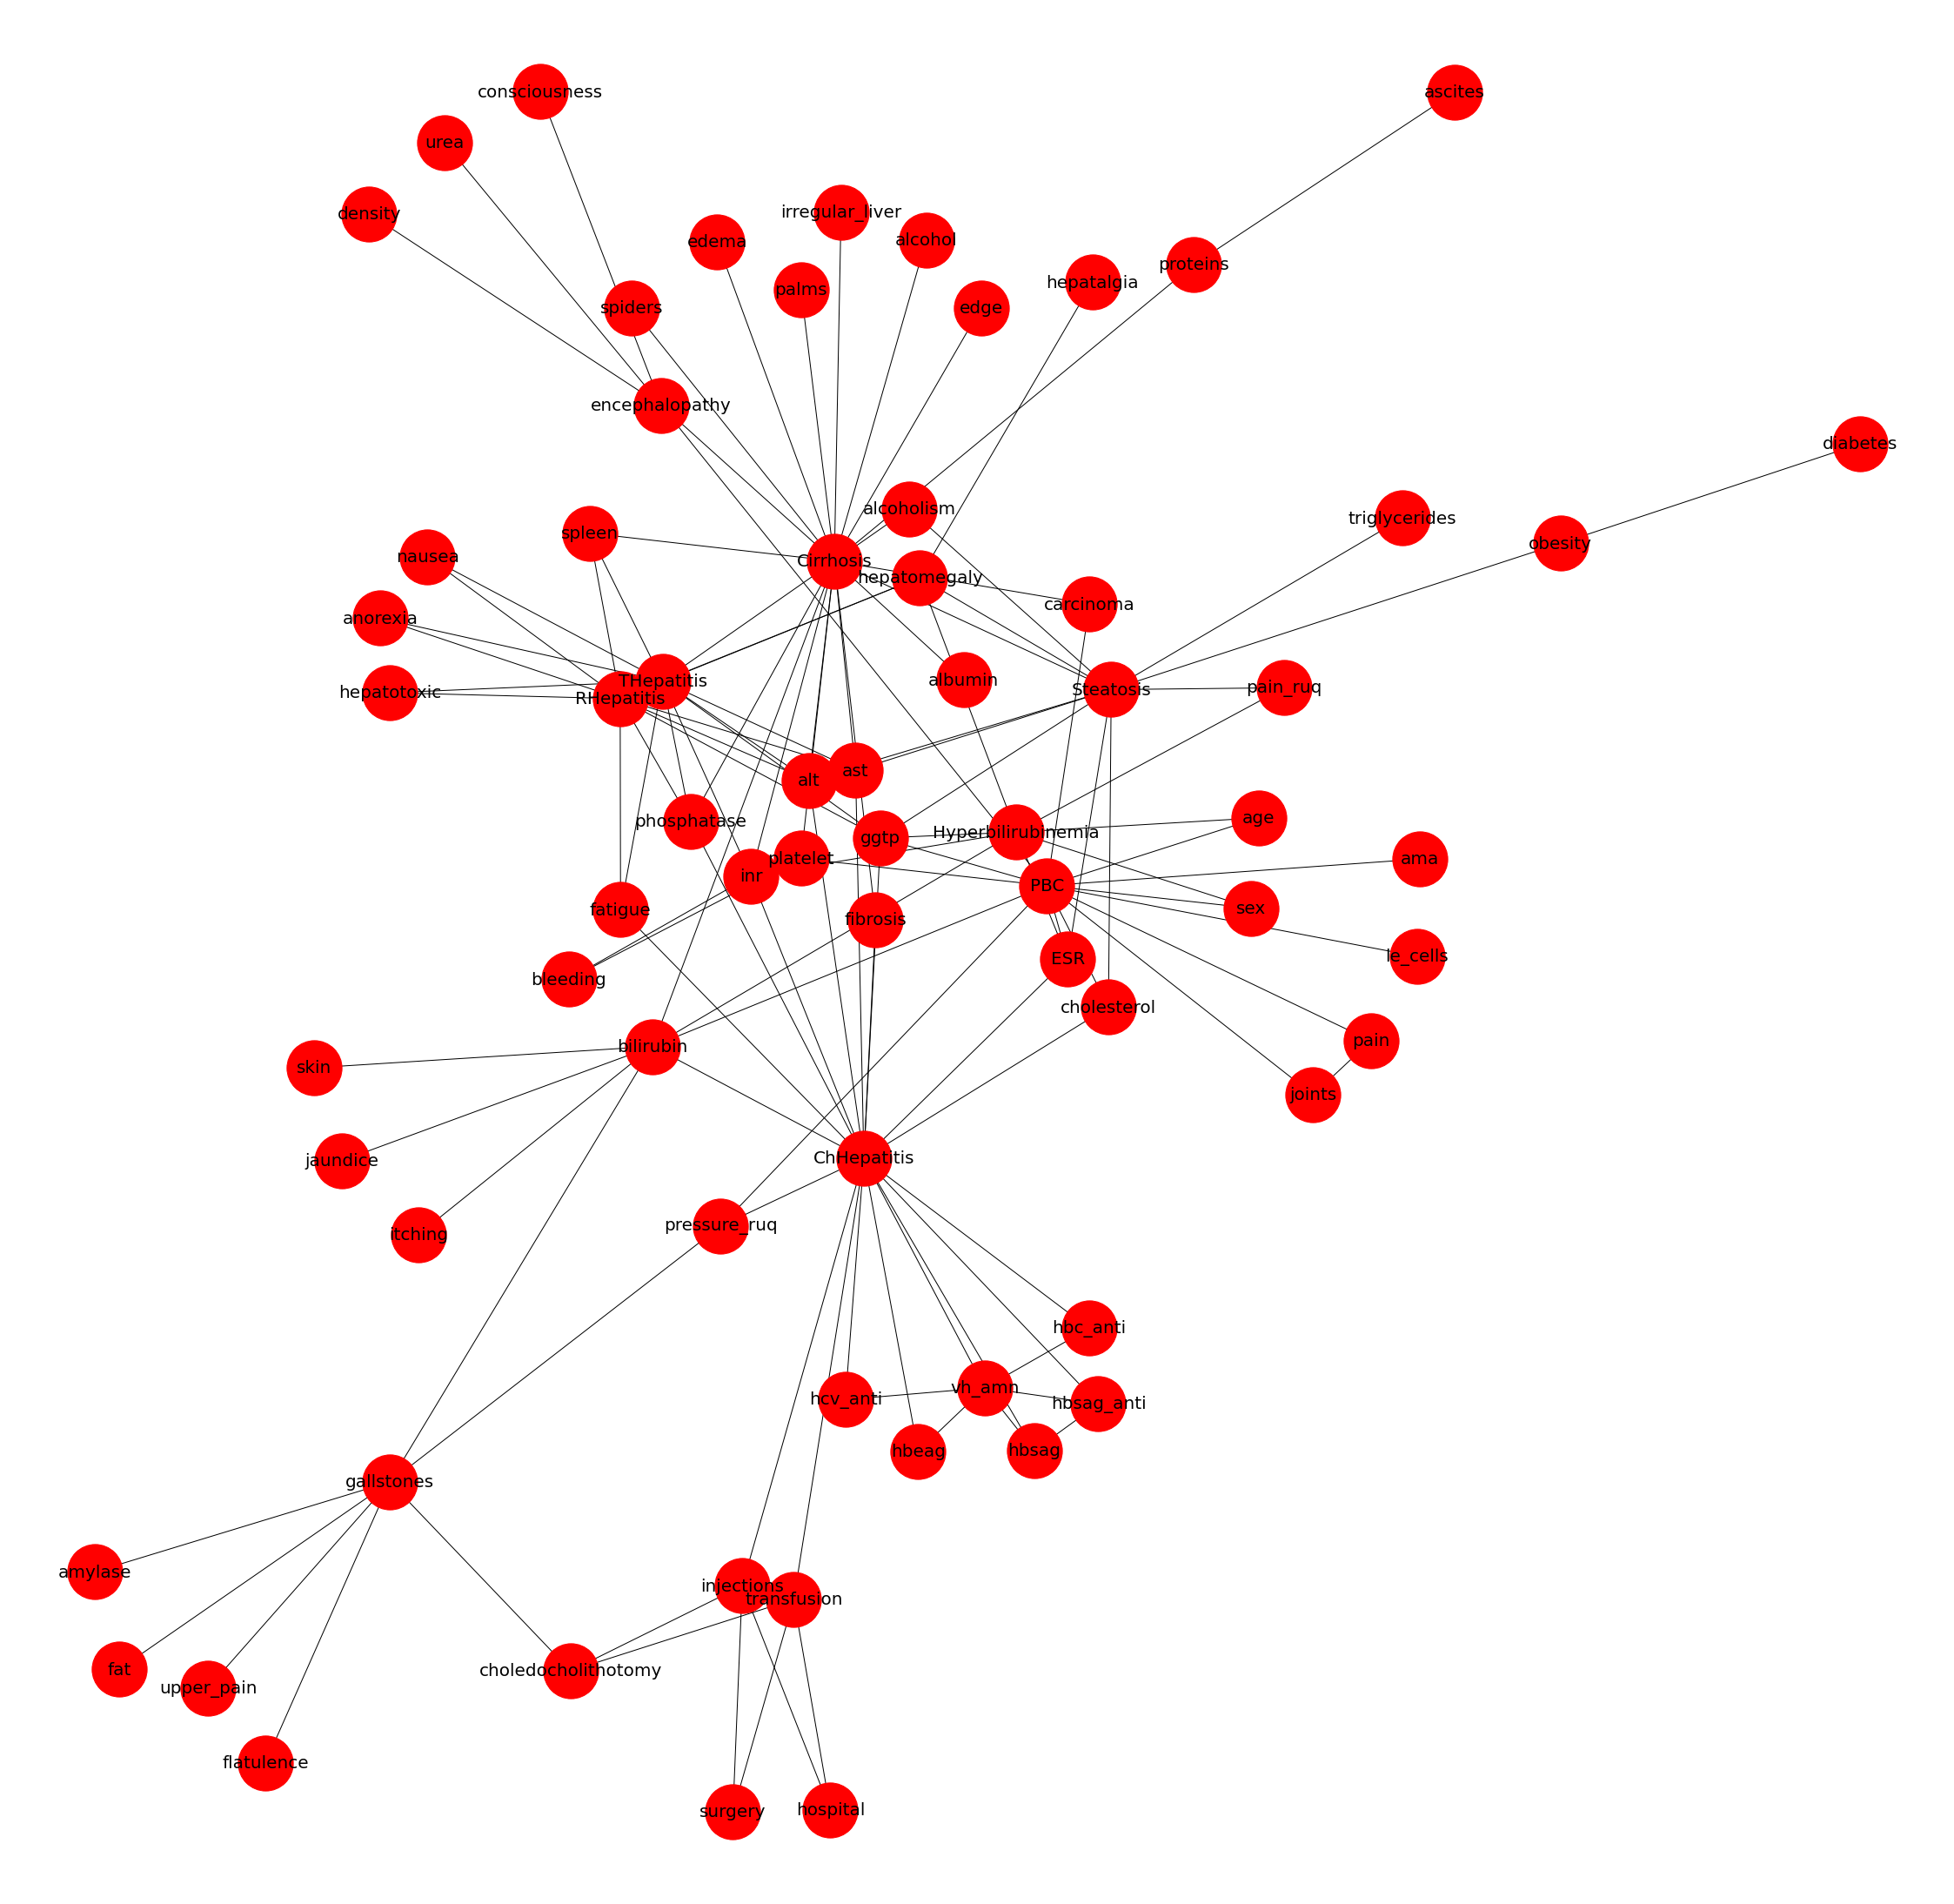

In [11]:
import networkx as nx
import pylab as plt
G = nx.Graph()
G.add_edges_from(model.edges())
pos = nx.spring_layout(G)
#pos = nx.spectral_layout(G)

#plt.figure(10, figsize = (5, 5))
fig, ax = plt.subplots(figsize=(40, 40))
nx.draw(G, pos=pos, with_labels=True, node_size = 4000, font_size = 20, arrowsize=1, node_color='red', ax=ax)
plt.show()


In [0]:
# Infering the posterior probability 
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

In [13]:
posterior_p = infer.query(['fibrosis']) 
print(posterior_p)

Eliminating: sex: 100%|██████████| 69/69 [00:03<00:00, 22.12it/s]

+-------------------+-----------------+
| fibrosis          |   phi(fibrosis) |
+===================+=================+
| fibrosis(present) |          0.0421 |
+-------------------+-----------------+
| fibrosis(absent)  |          0.9579 |
+-------------------+-----------------+


In [14]:
posterior_p = infer.query(['carcinoma'] , evidence={'obesity': 'present',
                                                   'alcohol': 'present'})
print(posterior_p)

Eliminating: Cirrhosis: 100%|██████████| 67/67 [00:09<00:00,  6.89it/s]

+--------------------+------------------+
| carcinoma          |   phi(carcinoma) |
+====================+==================+
| carcinoma(present) |           0.1013 |
+--------------------+------------------+
| carcinoma(absent)  |           0.8987 |
+--------------------+------------------+


In [15]:
posterior_p = infer.query(['carcinoma'] , evidence={'obesity': 'absent',
                                                   'alcohol': 'absent'})
print(posterior_p)

Eliminating: Cirrhosis: 100%|██████████| 67/67 [00:09<00:00,  6.89it/s]

+--------------------+------------------+
| carcinoma          |   phi(carcinoma) |
+====================+==================+
| carcinoma(present) |           0.0611 |
+--------------------+------------------+
| carcinoma(absent)  |           0.9389 |
+--------------------+------------------+


# Get the states of a node

In [25]:
states = model.get_cpds('carcinoma')
print(states)
print("***************")

# print cardinality
model.get_cpds('carcinoma').cardinality

#get values
model.get_cpds('carcinoma').values

+--------------------+-------------------------+-------------------------+-----------------------+-----------------------+-------------------+-------------------+
| Cirrhosis          | Cirrhosis(decompensate) | Cirrhosis(decompensate) | Cirrhosis(compensate) | Cirrhosis(compensate) | Cirrhosis(absent) | Cirrhosis(absent) |
+--------------------+-------------------------+-------------------------+-----------------------+-----------------------+-------------------+-------------------+
| PBC                | PBC(present)            | PBC(absent)             | PBC(present)          | PBC(absent)           | PBC(present)      | PBC(absent)       |
+--------------------+-------------------------+-------------------------+-----------------------+-----------------------+-------------------+-------------------+
| carcinoma(present) | 0.3636364               | 0.3                     | 0.2727273             | 0.2                   | 0.1               | 0.01              |
+--------------------+

array([[[0.3636364, 0.3      ],
        [0.2727273, 0.2      ],
        [0.1      , 0.01     ]],

       [[0.6363636, 0.7      ],
        [0.7272727, 0.8      ],
        [0.9      , 0.99     ]]])

What is the probability that the measurement of a persons blood pressure results in exeptional, given the fact that his kidney is functioning
bad?


What is the probability that the student has an exceptional blood
pressure, given the fact that we know he has been doing sports.


What is the probability that his kidney is bad functioning given the
fact that the blood pressure of the student is exceptional but we saw
him do sports?

What is the probability that we measure a high blood pressure given
the fact that we know nothing else about this person?

